# Выпускной проект. SQL

## Цель исследования
Анализ базы данных, содержащей информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг, для формулировки ценностного предложения для нового продукта: сервиса для чтения книг по подписке.

### Описание данных
**Таблица `books`** (содержит данные о книгах):
- `book_id` — идентификатор книги
- `author_id` — идентификатор автора
- `title` — название книги
- `num_pages` — количество страниц
- `publication_date` — дата публикации книги
- `publisher_id` — идентификатор издателя

**Таблица `authors`** (содержит данные об авторах):
- `author_id `— идентификатор автора
- `author` - имя автора

**Таблица `publishers`** (содержит данные об издательствах):
- `publisher_id` — идентификатор издательства
- `publisher` — название издательства

**Таблица `ratings`** (содержит данные о пользовательских оценках книг):
- `rating_id` — идентификатор оценки
- `book_id` — идентификатор книги
- `username` — имя пользователя, оставившего оценку
- `rating` — оценка книги

**Таблица `reviews`** (содержит данные о пользовательских обзорах на книги):
- `review_id` — идентификатор обзора
- `book_id` — идентификатор книги
- `username` — имя пользователя, написавшего обзор
- `text` — текст обзора


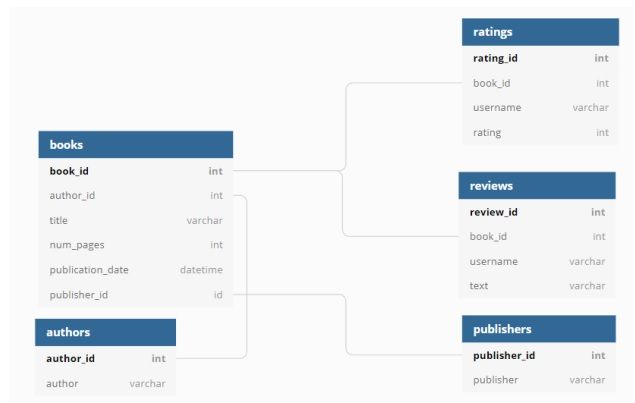

## Подготовка к загрузке данных

In [1]:
# импорт бибилиотек
import pandas as pd
import sqlalchemy as sa
pd.set_option('display.max_colwidth', None)

In [2]:
# связь с базой данных

# устанавливаем параметры
db_config = {
'user': ' ', # имя пользователя
'pwd': ' ', # пароль
'host': ' ',
'port': 0000, # порт подключения
'db': 'db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

# функция для выполнения SQl-запроса
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

In [3]:
# функция для вывода первых строк таблицы
def head(table):
    query = f'SELECT * FROM {table} LIMIT 5'
    return get_sql_data(query)

## Ознакомление с данными

### Таблица `books`

In [4]:
# выводим первые строки таблицы
head('books')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
# выводим количество строк в таблице, а также самую раннюю и самую позднюю дату публикации книг

query = '''SELECT COUNT(*),
                  MIN(publication_date),
                  MAX(publication_date)
           FROM books'''
get_sql_data(query)

,count,min,max
0,1000,1952-12-01,2020-03-31


Таблица `books` содержит информацию о 1000 книг, опубликованных за период с 01.12.1952 по 31.03.2020 гг.

### Таблица `authors`

In [6]:
# выводим первые строки таблицы
head('authors')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
# выводим количество строк в таблице
query = '''SELECT COUNT(*) FROM authors'''
get_sql_data(query)

,count
0,636


Таблица `authors` содержит имена и фамилии 636 писателей.

### Таблица `publishers`

In [8]:
# выводим первые строки таблицы
head('publishers')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [9]:
# выводим количество строк в таблице
query = '''SELECT COUNT(*) FROM publishers'''
get_sql_data(query)

,count
0,340


Таблица `publishers` содержит наименования 340 издательств.

### Таблица `ratings`

In [10]:
# выводим первые строки таблицы
head('ratings')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [11]:
# выводим сводную информацию
query = '''SELECT COUNT(*),
                  COUNT(DISTINCT book_id) as books,
                  COUNT(DISTINCT username) as users,
                  MIN(rating),
                  MAX(rating),
                  ROUND(AVG(rating),2)
           FROM ratings'''
get_sql_data(query)

,count,books,users,min,max,round
0,6456,1000,160,1,5,3.93


Таблица `ratings` содержит 6456 записей об оценках, поставленных 160 пользователями.

Количество книг с оценками: 1000.

Оценки проставлятся по 5-балльной шкале (от 1 до 5). Средний рейтинг книг: 3,93.

### Таблица `reviews`

In [12]:
# выводим первые строки таблицы
head('reviews')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


In [13]:
# выводим сводную информацию
query = '''SELECT COUNT(review_id) as reviews,
                  COUNT(DISTINCT book_id) as books,
                  COUNT (DISTINCT username) as users
           FROM reviews'''
get_sql_data(query)

,reviews,books,users
0,2793,994,160


Количество обзоров в таблице `reviews`: 2793

Количество книг, на которые были написано обзоры: 994

Авторов обзоров: 160

## Задание 1: Посчитайте, сколько книг вышло после 1 января 2000 года

In [14]:
query = "SELECT COUNT(book_id) FROM books WHERE publication_date::date > '2000-01-01'"
get_sql_data(query)

,count
0,819


После 01.01.2000 вышло 819 книг, что составляет 81,9% книг, информация о которых содержится в таблице `books`.

## Задание 2: Для каждой книги посчитайте количество обзоров и среднюю оценку

In [15]:
query = '''SELECT b.title,
                  COUNT(DISTINCT rv.review_id) reviews_count,
                  ROUND(AVG(rt.rating),2) avg_rating
           FROM books AS b
           JOIN ratings AS rt ON b.book_id = rt.book_id
           LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
           GROUP BY b.book_id
           ORDER BY reviews_count DESC, avg_rating DESC'''
get_sql_data(query)

,title,reviews_count,avg_rating
0,Twilight (Twilight #1),7,3.66
1,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.41
2,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.29
3,The Book Thief,6,4.26
4,The Glass Castle,6,4.21
...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden Book),0,4.00
996,Leonardo's Notebooks,0,4.00
997,Essential Tales and Poems,0,4.00
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


В сводной таблице представлены количество обзоров и средняя оценка всех 1000 книг из таблицы `books`. Количество обзоров одной книги варьируется от 0 до 7.

Больше всего обзоров (7) было написано на первую книгу серии "Сумерки". Средний рейтинг этой книги при этом ниже среднего по всей таблице - отзывы, скорее всего, не самые хвалебные.

## Задание 3: Определите издательство, которое выпустило наибольшее число книг толще 50 страниц

In [16]:
query = '''WITH b_count AS (SELECT COUNT(b.book_id) AS books_count,
                              p.publisher_id,
                              p.publisher
                            FROM publishers AS p
                            JOIN books AS b on b.publisher_id = p.publisher_id
                            WHERE b.num_pages > 50
                            GROUP BY p.publisher_id)
           SELECT publisher,
                  books_count
           FROM b_count
           ORDER BY books_count DESC
           LIMIT 1'''
get_sql_data(query)

,publisher,books_count
0,Penguin Books,42


Больше всего книг толще 50 страниц выпустило издательство Penguin Books. Всего таких книг оно выпустило 42.

## Задание 4: Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [17]:
query = '''WITH over50 AS (SELECT book_id,
                                  COUNT(rating_id) AS rating_count
                                  FROM ratings
                                  GROUP BY book_id
                                  HAVING COUNT(rating_id) >= 50)
           SELECT a.author,
                  AVG(rt.rating) AS avg_rating
           FROM over50 AS over50
           JOIN books AS b ON b.book_id = over50.book_id
           JOIN authors AS a ON b.author_id = a.author_id
           JOIN ratings AS rt ON rt.book_id = over50.book_id
           GROUP BY a.author
           ORDER BY avg_rating DESC
           LIMIT 1'''
get_sql_data(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


Самым высоким средним рейтингом среди книг с 50 и более оценками обладают книги авторства Джоан Роулинг с иллюстрациями Мари ГранПре. Средний рейтинг книг - 4,29.

## Задание 5: Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [18]:
query = '''WITH over48 AS (SELECT username,
                                  COUNT(rating)
                           FROM ratings
                           GROUP BY username
                           HAVING COUNT(rating) > 48),
           reviews_count AS (SELECT over48.username,
                                    COUNT(rv.review_id) as rev_count
                             FROM reviews AS rv
                             JOIN over48 AS over48 ON over48.username = rv.username
                             GROUP BY over48.username)
           SELECT AVG(rev_count)
           FROM reviews_count'''
get_sql_data(query)

,avg
0,24.0


Активно читающие пользователи, поставившие более 48 оценок, в среднем написали по 24 обзора книг.

## Общий вывод

Для анализа была предоставлена база данных, содержащая информацию о книгах, издательствах, авторах, пользовательских обзорах и оценках книг. Сводная информация:

<!DOCTYPE html>
<html>
<style>
table, th, td {
  border:1px solid black;
}
</style>
<body>

<table>
  <tr>
    <th>Параметр</th>
    <th>Значение</th>
  </tr>
  <tr>
    <td>количество книг в базе</td>
    <td>1000</td>  
  </tr>
  <tr>
    <td>период публикации книг</td>
    <td>1952-2020 гг.</td>
  </tr>
  <tr>
    <td>количество авторов</td>
    <td>636</td>
  </tr>
  <tr>
    <td>количество издательств</td>
    <td>340</td>
  </tr> 
  <tr>
    <td>количество пользователей, поставивших оценку и/или написавших обзор</td>
    <td>160</td>
  </tr> 
  <tr>
    <td>количество пользовательских оценок</td>
    <td>6456</td>
  </tr>     
  <tr>
    <td>количество книг с оценками</td>
    <td>1000</td>
  </tr> 
  <tr>
    <td>среднее количество оценок на книгу</td>
    <td>6,46</td>
  </tr>
  <tr>
    <td>среднее количество поставленных пользователем оценок</td>
    <td>41</td>
  </tr>
  <tr>
    <td>шкала рейтинга</td>
    <td>1-5</td>
  </tr>
  <tr>
    <td>средний рейтинг книг</td>
    <td>3,93</td>
  </tr>
  <tr>
    <td>количество пользовательских обзоров</td>
    <td>2793</td>
  </tr>
  <tr>
    <td>количество книг с обзорами</td>
    <td>994</td>
  </tr>
  <tr>
    <td>среднее количество обзоров на книгу</td>
    <td>2,81</td>
  </tr>
  <tr>
    <td>среднее количество написанных пользователем обзоров</td>
    <td>17</td>
  </tr>
</table>

</body>
</html>


**Выводы и наблюдения:**

1. Большинство книг в базе были написаны относительно недавно: 81,9% книг были написаны после 01.01.2000 г.

2. Книга, на которую было написано больше всего обзоров (7) - первая книга из серии "Сумерки". Рейтинг этой книги ниже среднего.

3. Наибольшее количество книг объемом больше 50 страниц было выпущено издательством Penguin Books.

4. Самым высоким средним рейтингом среди книг с 50 и более оценками обладают книги авторства Джоан Роулинг с иллюстрациями Мари ГранПре. Средний рейтинг книг - 4,29.

5. Наиболее активные пользователи, поставившие более 48 оценок, в среднем написали по 24 обзора книг.

Полученные данные можно использовать для анализа популярности книг и определения стратегии формирования предложений пользователям сервиса.